https://www.hse.ru/data/2017/07/22/1173852775/NLPandDA_4print.pdf
    

In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

In [2]:
data = {
    'link': ['http://kremlin.ru/events/president/transcripts/messages/62582',
             'http://kremlin.ru/events/president/transcripts/messages/59863',
             'http://kremlin.ru/events/president/transcripts/messages/56957',
             'http://kremlin.ru/events/president/transcripts/messages/53379',
             'http://kremlin.ru/events/president/transcripts/messages/50864',
             'http://kremlin.ru/events/president/transcripts/messages/47173',
             'http://kremlin.ru/events/president/transcripts/messages/19825',
             'http://kremlin.ru/events/president/transcripts/messages/17118',
             'http://kremlin.ru/events/president/transcripts/messages/14088',
             'http://kremlin.ru/events/president/transcripts/messages/9637',
             'http://kremlin.ru/events/president/transcripts/messages/5979',
             'http://kremlin.ru/events/president/transcripts/messages/1968'],
    'year': [2020, 2019, 2018, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
}

In [3]:
data = pd.DataFrame(data)

In [4]:
files =  []
for i in data['link']:
    files.append(i.split('/')[-1] + '.txt')
data['file'] = files

In [5]:
data

,link,year,file
0,http://kremlin.ru/events/president/transcripts...,2020,62582.txt
1,http://kremlin.ru/events/president/transcripts...,2019,59863.txt
2,http://kremlin.ru/events/president/transcripts...,2018,56957.txt
3,http://kremlin.ru/events/president/transcripts...,2016,53379.txt
4,http://kremlin.ru/events/president/transcripts...,2015,50864.txt
5,http://kremlin.ru/events/president/transcripts...,2014,47173.txt
6,http://kremlin.ru/events/president/transcripts...,2013,19825.txt
7,http://kremlin.ru/events/president/transcripts...,2012,17118.txt
8,http://kremlin.ru/events/president/transcripts...,2011,14088.txt
9,http://kremlin.ru/events/president/transcripts...,2010,9637.txt


In [6]:
characters_num = []
content_list = []
for file_name in files:
    f=open("..\\dataset\\" + file_name, "r")
    if f.mode == 'r':
        content =f.read()
    content = content.replace('\n\n',' ')
    characters_num.append(len(content))
    content_list.append(content)

In [7]:
data['message'] = content_list

In [8]:
data

,link,year,file,message
0,http://kremlin.ru/events/president/transcripts...,2020,62582.txt,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019,59863.txt,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018,56957.txt,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016,53379.txt,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015,50864.txt,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014,47173.txt,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013,19825.txt,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012,17118.txt,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011,14088.txt,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010,9637.txt,Уважаемые граждане России! Уважаемые депутаты ...


C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


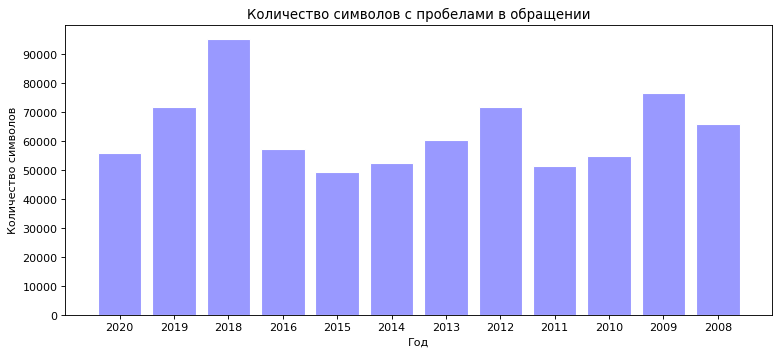

In [9]:
# https://github.com/rougier/matplotlib-tutorial

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (912 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Количество символов с пробелами в обращении')
plt.xlabel('Год')
plt.ylabel('Количество символов')

X = np.arange(12)
Y = characters_num

plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')
plt.xticks(X, data['year'])

ax = plt.axes()
ax.set_yticks(np.arange(0, 100000, 10000))

plt.xlim(X.min()-1, X.max()+1)
plt.ylim(0, 100000)

plt.show()

fig.savefig('..\\images\\characters_num.png')

In [61]:
years_list = [i for i in range(2008,2021)]
years_list = years_list[::-1]
years_list.remove(2017)

top20_NOUN = dict.fromkeys(years_list)
top20_ADJ = dict.fromkeys(years_list)
top20_PROPN = dict.fromkeys(years_list)

In [62]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

for data_index in range(len(data)):
    message = data['message'][data_index]
    doc = Doc(message)
    
    doc.segment(segmenter)
    
    doc.tag_morph(morph_tagger)
    
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    
    text = []
    pos = []
    lemma = []
    for i in range(len(doc.tokens)):
        text.append(doc.tokens[i].text)
        pos.append(doc.tokens[i].pos)
        lemma.append(doc.tokens[i].lemma)
    lemma_df = pd.DataFrame()
    lemma_df['text'] = text
    lemma_df['pos'] = pos
    lemma_df['lemma'] = lemma
    
    grouped = lemma_df.groupby('lemma')
    grouped = grouped.count()
    
    grouped_dict = dict(grouped)
    frecuency_lict = []
    for i in range(len(lemma_df)):
        i_lemma = lemma_df['lemma'][i]
        frecuency_lict.append(grouped_dict['text'][i_lemma])
    
    lemma_df['freq'] = frecuency_lict
     
    lemma_df_NOUN = lemma_df[lemma_df['pos']=='NOUN']
    NOUN_20 = lemma_df_NOUN.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:20]
    top20_NOUN[data['year'][data_index]] = NOUN_20
    
    lemma_df_ADJ = lemma_df[lemma_df['pos']=='ADJ']
    ADJ_20 = lemma_df_ADJ.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:20]
    top20_ADJ[data['year'][data_index]] = ADJ_20
    
    lemma_df_PROPN = lemma_df[lemma_df['pos']=='PROPN']
    PROPN_20 = lemma_df_PROPN.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:20]
    top20_PROPN[data['year'][data_index]] = PROPN_20

In [63]:
top20_PROPN[2008]

,lemma,freq
2,россия,44
1538,а,44
7134,год,28
4657,право,26
2742,конституция,24
4028,федерация,23
8629,организация,17
3675,дума,14
2886,деятельность,14
6887,правительство,12
